In [1]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix


import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd




In [2]:
data = pd.read_csv('final_with_covid_AS.csv')


# car driver

In [4]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [5]:
target = filtered_data['Severity'].shift(-1)

In [6]:


X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]




x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 19.137867495267628
MAE: 11.283406745942624
R^2: 0.812319967780135


In [6]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 14.287998128432056
MAE: 9.28643895820491
R^2: 0.7532146007910308


In [7]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
Nmse_values = []
ioa_values = []
r2_values = []
aic_values=[]
bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)




x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 14.287998128432056
MAE: 9.28643895820491
R^2: 0.7532146007910308
NMSE score: 0.3238647368813774
Index of Agreement: 0.92
AIC: 19527.6782586787
BIC: 19782.04738091424


In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted_counts)


0.7532146007910308

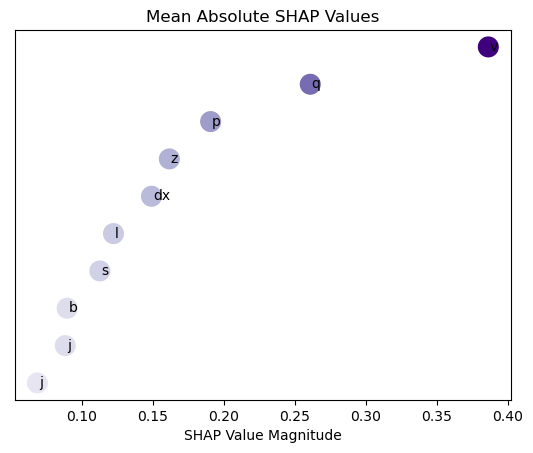

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  

new_feature_names = ['j','j','b','s','l','dx','z','p','q','v']  # لیست نام‌های جدید متغیرها

# تکرار عناصر در new_feature_names برای تطابق با تعداد عناصر در top_features_indices
new_feature_names = np.tile(new_feature_names, len(top_features_indices) // len(new_feature_names) + 1)[:len(top_features_indices)]

plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate(new_feature_names):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()


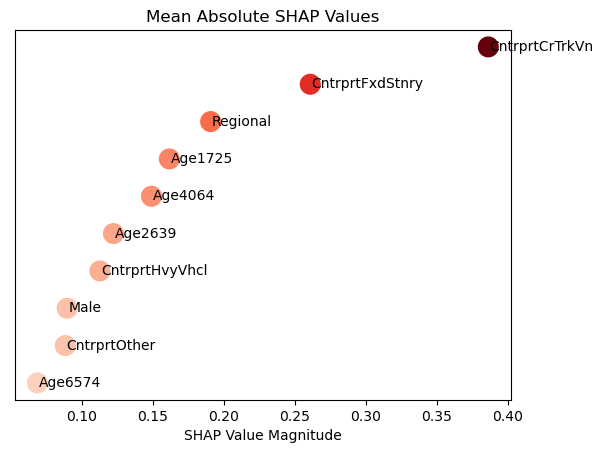

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Reds')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()


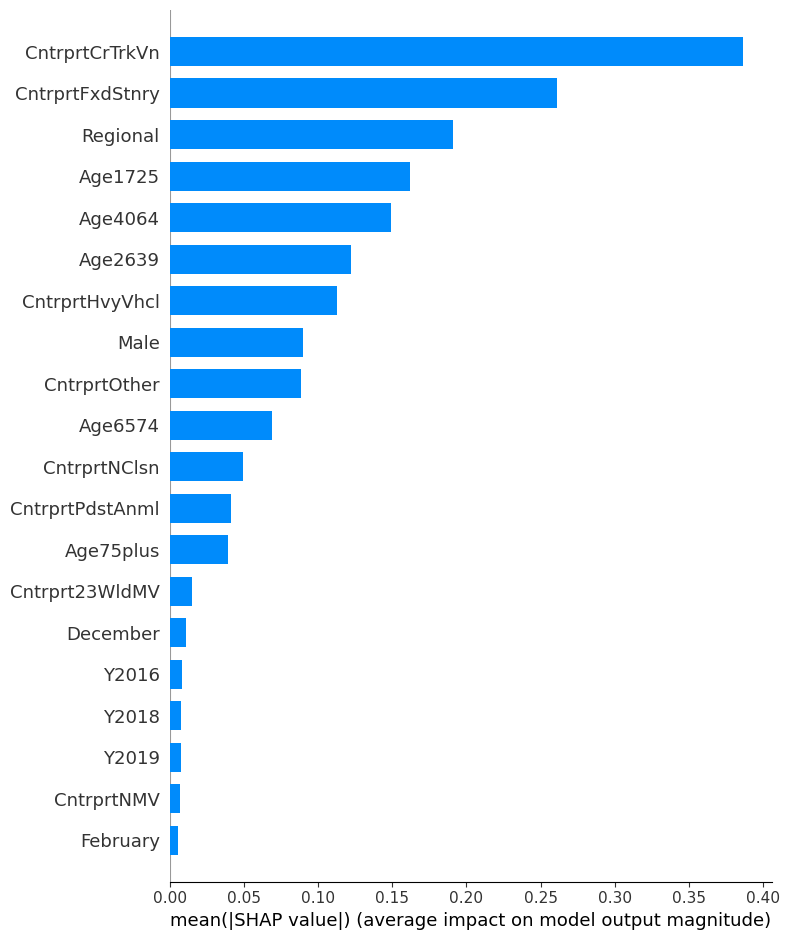

In [10]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
CntrprtCrTrkVn    CntrprtCrTrkVn         0.386469
CntrprtFxdStnry  CntrprtFxdStnry         0.261074
Regional                Regional         0.190904
Age1725                  Age1725         0.161839
Age4064                  Age4064         0.149263
Age2639                  Age2639         0.122496
CntrprtHvyVhcl    CntrprtHvyVhcl         0.112899
Male                        Male         0.089879
CntrprtOther        CntrprtOther         0.088548
Age6574                  Age6574         0.068918


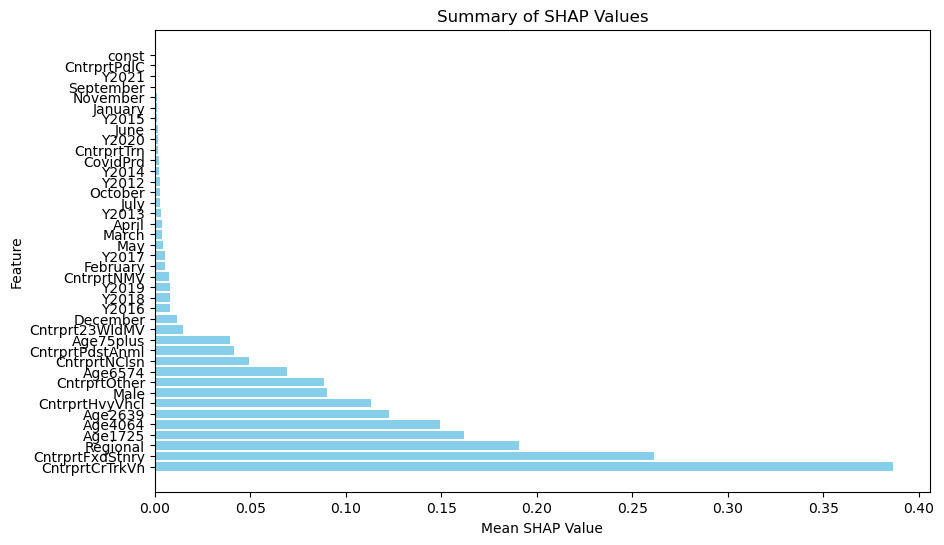

In [13]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


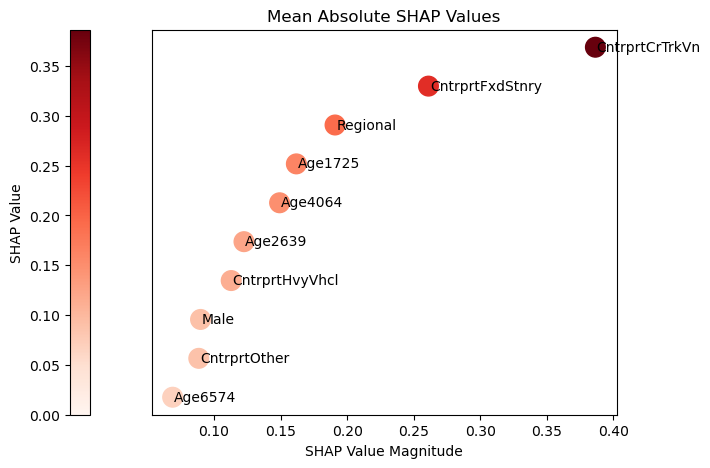

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Reds')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

fig, ax = plt.subplots(figsize=(8, 5))

top_features_indices = sorted_indices[-10:]  
scatter = ax.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    ax.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

ax.set_xlabel('SHAP Value Magnitude')
ax.set_title('Mean Absolute SHAP Values')

ax.set_yticks([])

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,location='left')
cbar.set_label('SHAP Value')

plt.show()


# car passanger

In [15]:
filtered_data2 = data[data['CarPngr'] == 1]

In [16]:
target = filtered_data2['Severity'].shift(-1)

In [17]:

X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]




x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

ValueError: x and y must be the same size

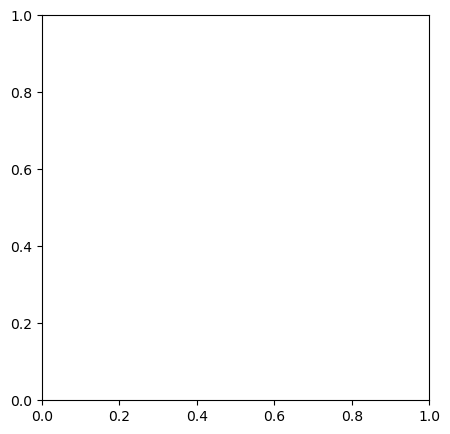

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [19]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [20]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)




x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 7.3292826180227015
MAE: 5.107266447229622
R^2: 0.4974418044714126
NMSE score: 0.4286883330989723
Index of Agreement: 0.81
AIC: 13817.988217907385
BIC: 14069.955752810512


In [21]:
from sympy import symbols, log

# Define symbols
rss, n, p = symbols('rss n p')

# AIC Calculation
aic_formula = n * log(rss / n) + 2 * (p + 1)
print("AIC Formula: ", aic_formula)

# BIC Calculation
bic_formula = n * log(rss / n) + log(n) * (p + 1)
print("BIC Formula: ", bic_formula)


AIC Formula:  n*log(rss/n) + 2*p + 2
BIC Formula:  n*log(rss/n) + (p + 1)*log(n)


In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted_counts)


0.4974418044714126

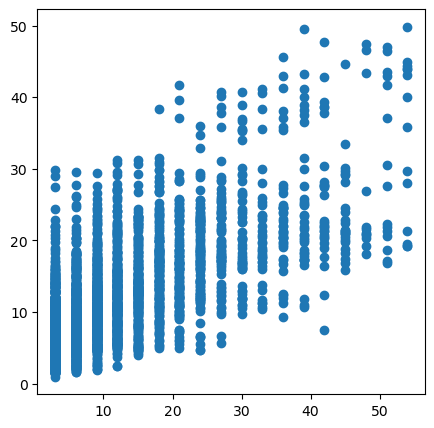

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

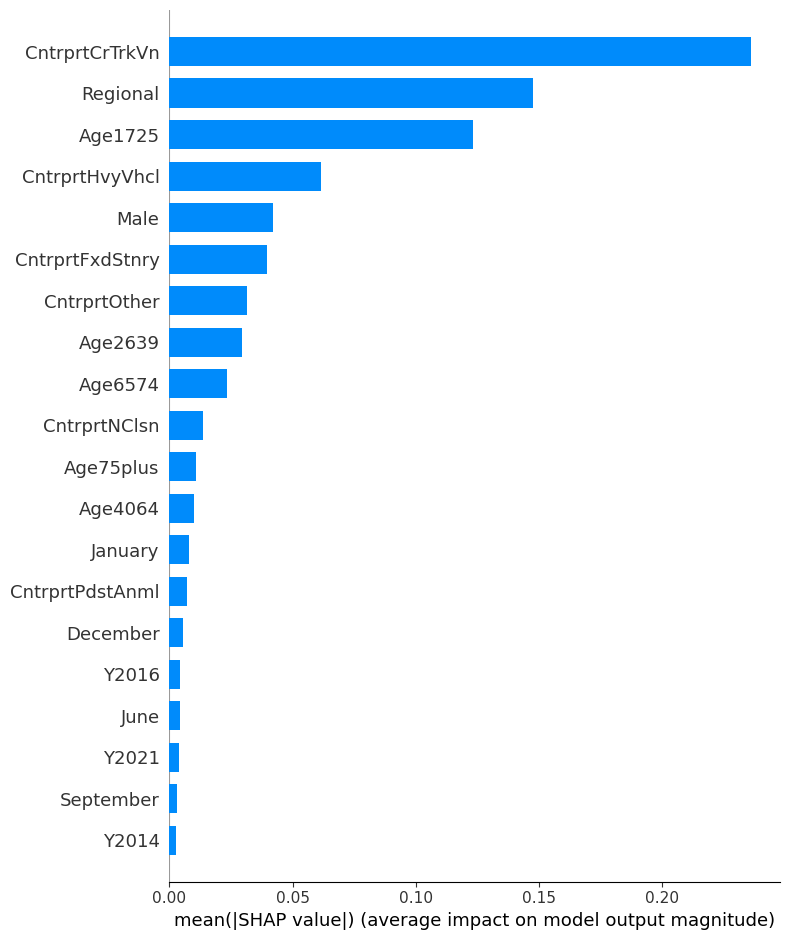

In [24]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
CntrprtCrTrkVn    CntrprtCrTrkVn         0.235918
Regional                Regional         0.147351
Age1725                  Age1725         0.123310
CntrprtHvyVhcl    CntrprtHvyVhcl         0.061636
Male                        Male         0.042214
CntrprtFxdStnry  CntrprtFxdStnry         0.039549
CntrprtOther        CntrprtOther         0.031560
Age2639                  Age2639         0.029488
Age6574                  Age6574         0.023411
CntrprtNClsn        CntrprtNClsn         0.013631


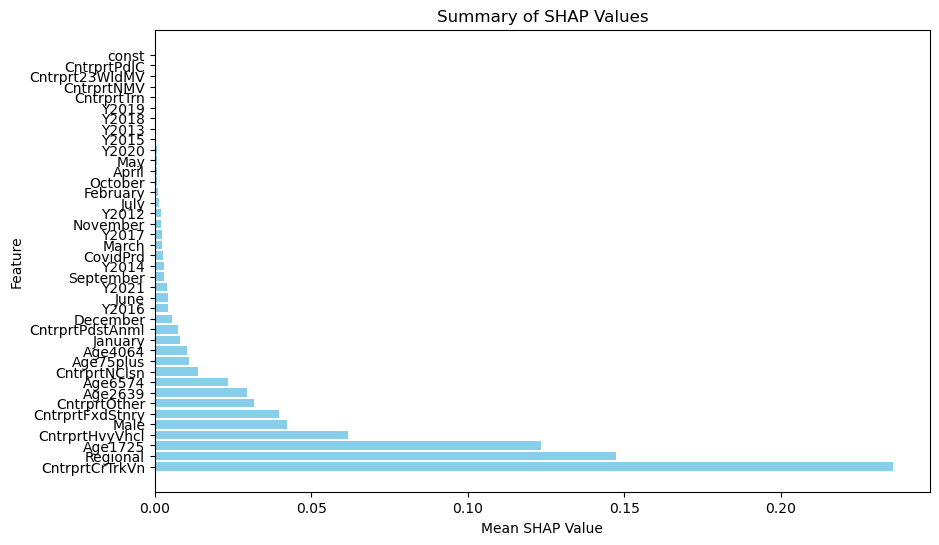

In [24]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


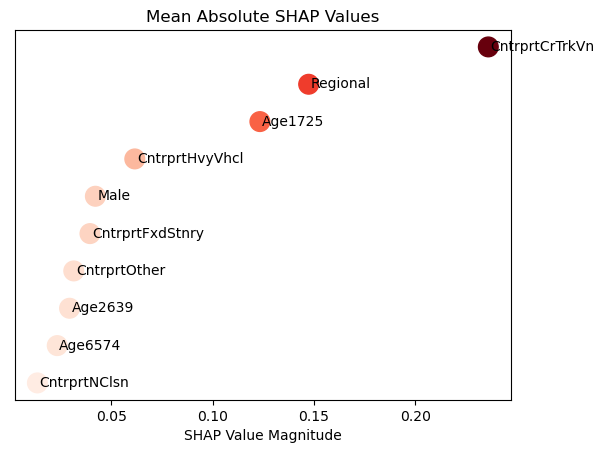

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Reds')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()


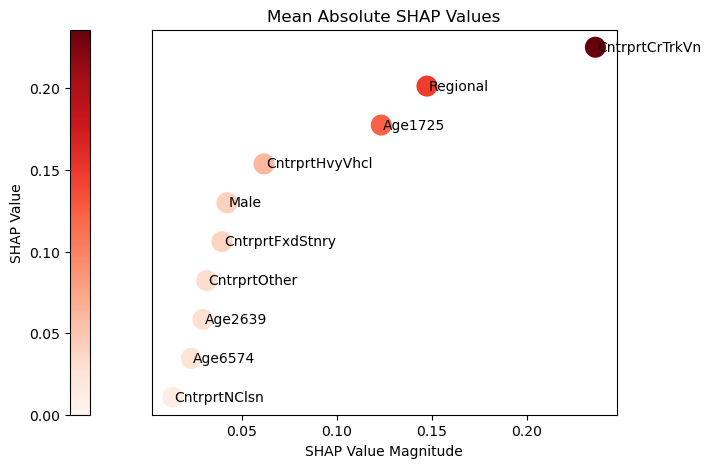

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Reds')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

fig, ax = plt.subplots(figsize=(8, 5))

top_features_indices = sorted_indices[-10:]  
scatter = ax.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    ax.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

ax.set_xlabel('SHAP Value Magnitude')
ax.set_title('Mean Absolute SHAP Values')

ax.set_yticks([])

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,location='left')
cbar.set_label('SHAP Value')

plt.show()


# Mtrcyclist REGRESION

In [27]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

In [28]:
target = filtered_data3['Severity'].shift(-1)

In [29]:

X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [30]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [31]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)




x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 10.989108237646493
MAE: 6.923297254268111
R^2: 0.8267279533875785
NMSE score: 0.32157879430922803
Index of Agreement: 0.95
AIC: 15700.230517290573
BIC: 15949.874137646215


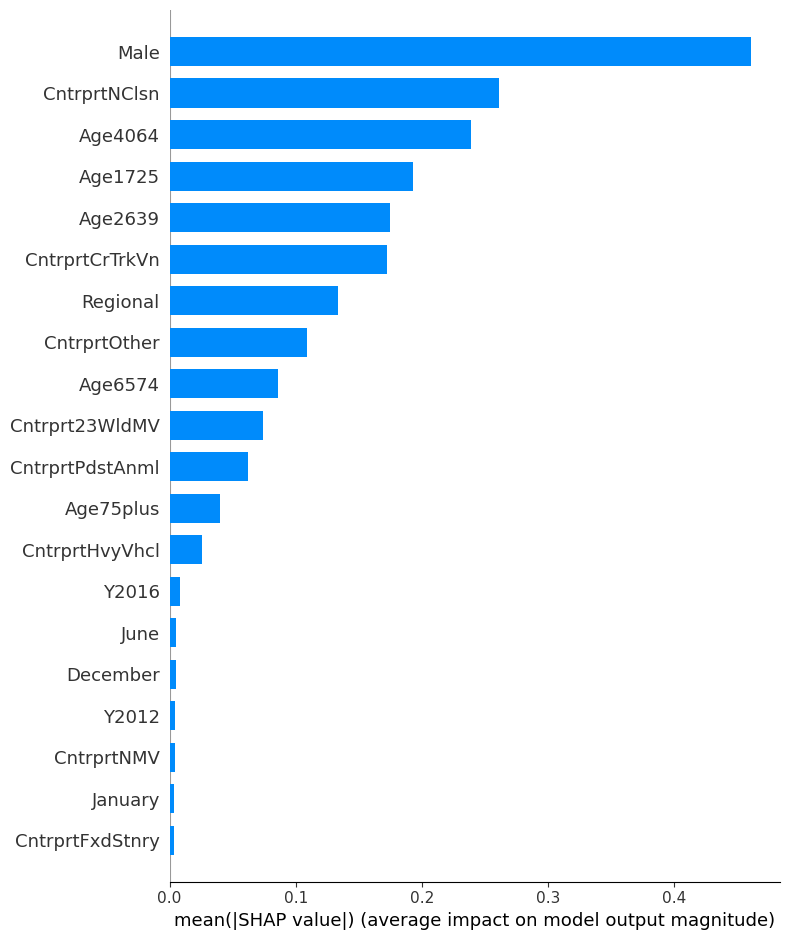

In [32]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                       Feature  Mean SHAP Value
Male                      Male         0.460896
CntrprtNClsn      CntrprtNClsn         0.261189
Age4064                Age4064         0.239209
Age1725                Age1725         0.192865
Age2639                Age2639         0.174463
CntrprtCrTrkVn  CntrprtCrTrkVn         0.172476
Regional              Regional         0.133144
CntrprtOther      CntrprtOther         0.108604
Age6574                Age6574         0.086051
Cntrprt23WldMV  Cntrprt23WldMV         0.073750


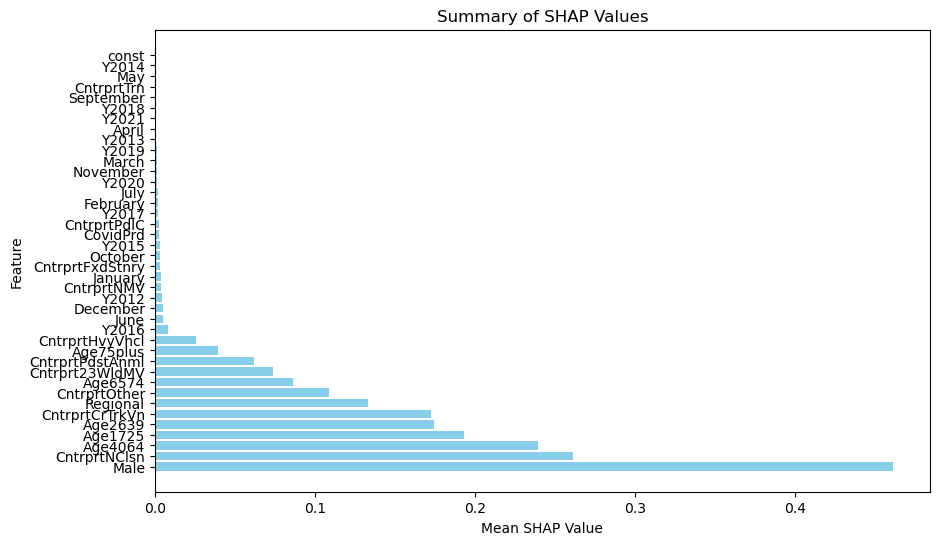

In [33]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


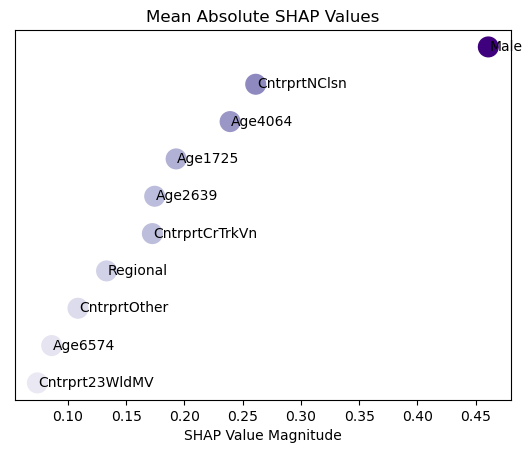

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()


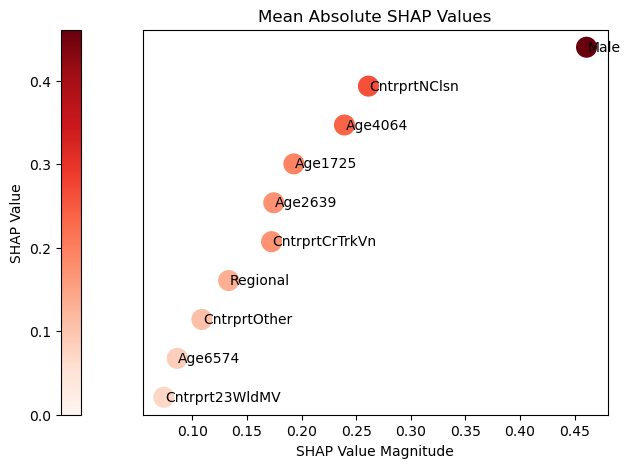

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Reds')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

fig, ax = plt.subplots(figsize=(8, 5))

top_features_indices = sorted_indices[-10:]  
scatter = ax.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    ax.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

ax.set_xlabel('SHAP Value Magnitude')
ax.set_title('Mean Absolute SHAP Values')

ax.set_yticks([])

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,location='left')
cbar.set_label('SHAP Value')

plt.show()


# Pedal cyclist Regrasion

In [36]:
filtered_data4 = data[data['PdlCyclist'] == 1]
target = filtered_data4['Severity'].shift(-1)

X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [37]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [38]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)




x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 9.329814901717405
MAE: 6.051179333129607
R^2: 0.7001375761385774
NMSE score: 0.41820080326654807
Index of Agreement: 0.90
AIC: 16214.74642866612
BIC: 16468.61912216213


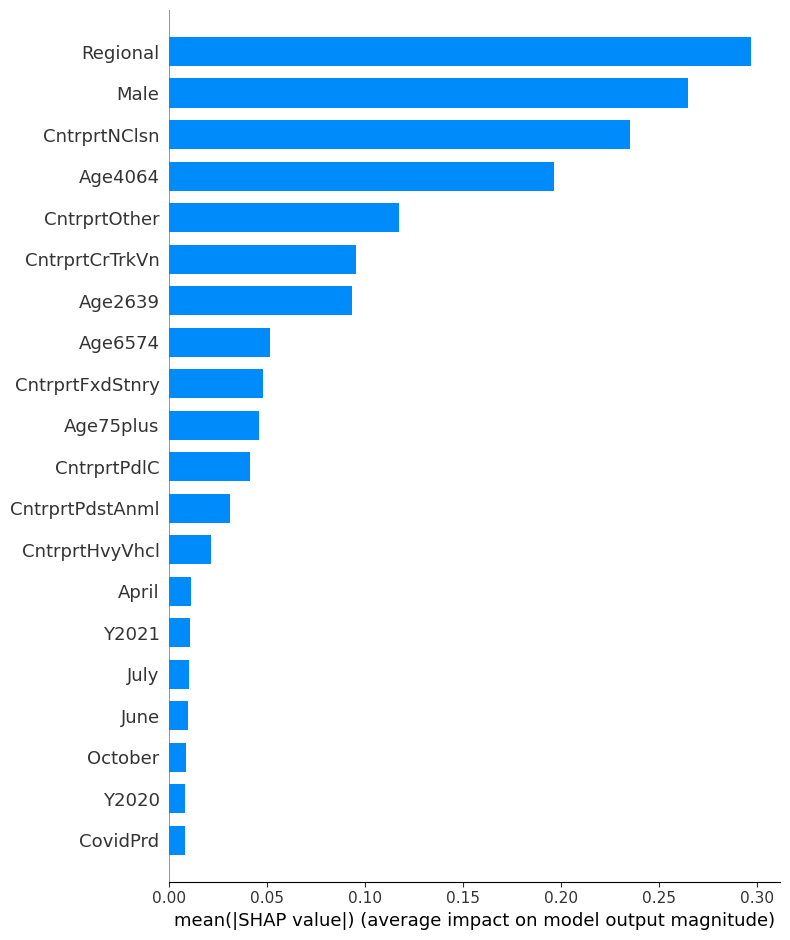

In [39]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
Regional                Regional         0.296917
Male                        Male         0.264958
CntrprtNClsn        CntrprtNClsn         0.235193
Age4064                  Age4064         0.196351
CntrprtOther        CntrprtOther         0.117248
CntrprtCrTrkVn    CntrprtCrTrkVn         0.095118
Age2639                  Age2639         0.093348
Age6574                  Age6574         0.051638
CntrprtFxdStnry  CntrprtFxdStnry         0.047639
Age75plus              Age75plus         0.045586


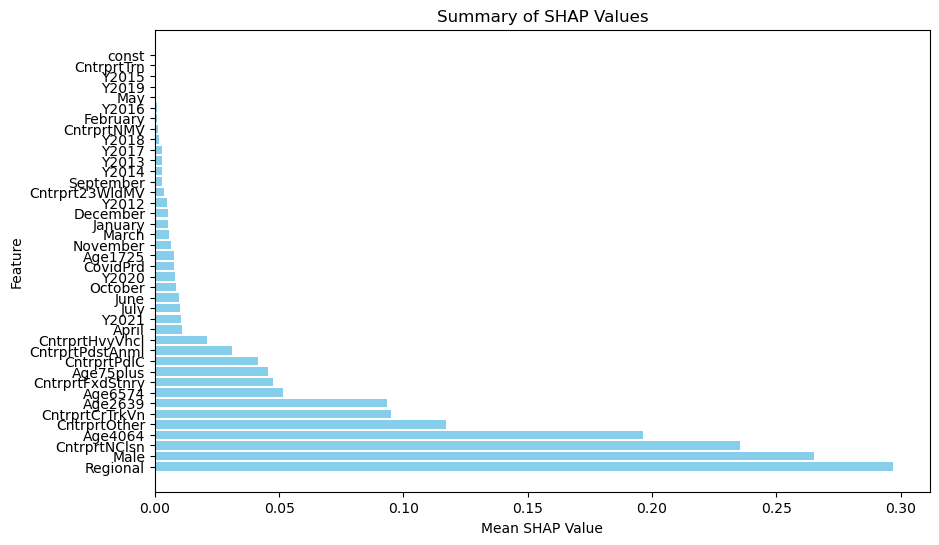

In [40]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


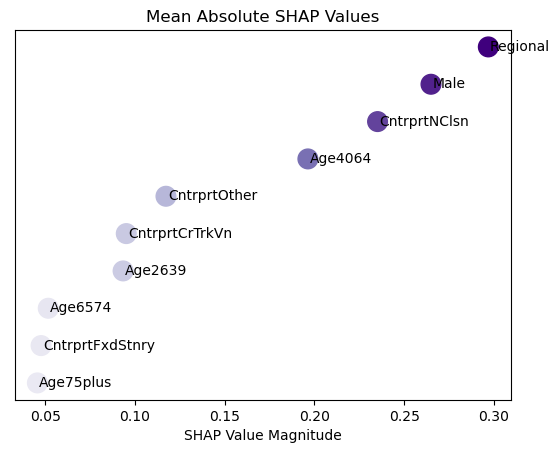

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()


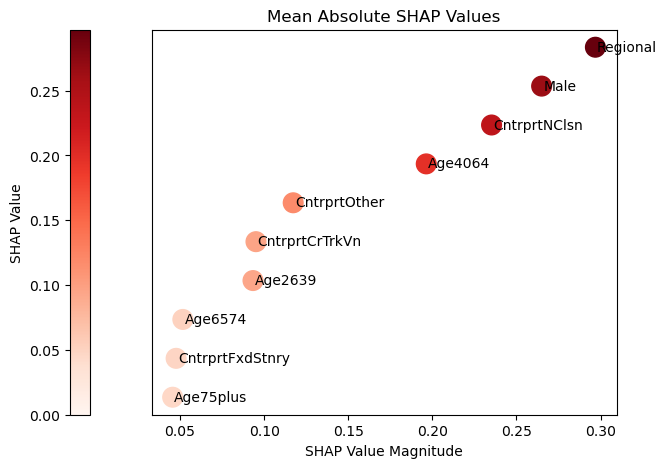

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Reds')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

fig, ax = plt.subplots(figsize=(8, 5))

top_features_indices = sorted_indices[-10:]  
scatter = ax.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    ax.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

ax.set_xlabel('SHAP Value Magnitude')
ax.set_title('Mean Absolute SHAP Values')

ax.set_yticks([])

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,location='left')
cbar.set_label('SHAP Value')

plt.show()


# Pedestrian REGRESION

In [43]:
filtered_data5 = data[data['Pedestrian'] == 1]
target = filtered_data5['Severity'].shift(-1)

In [44]:

X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [45]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)




x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 7.273592049810926
MAE: 4.868004474613527
R^2: 0.7583487122387149
NMSE score: 0.29863911203509075
Index of Agreement: 0.92
AIC: 7197.521438297176
BIC: 7422.678902714987


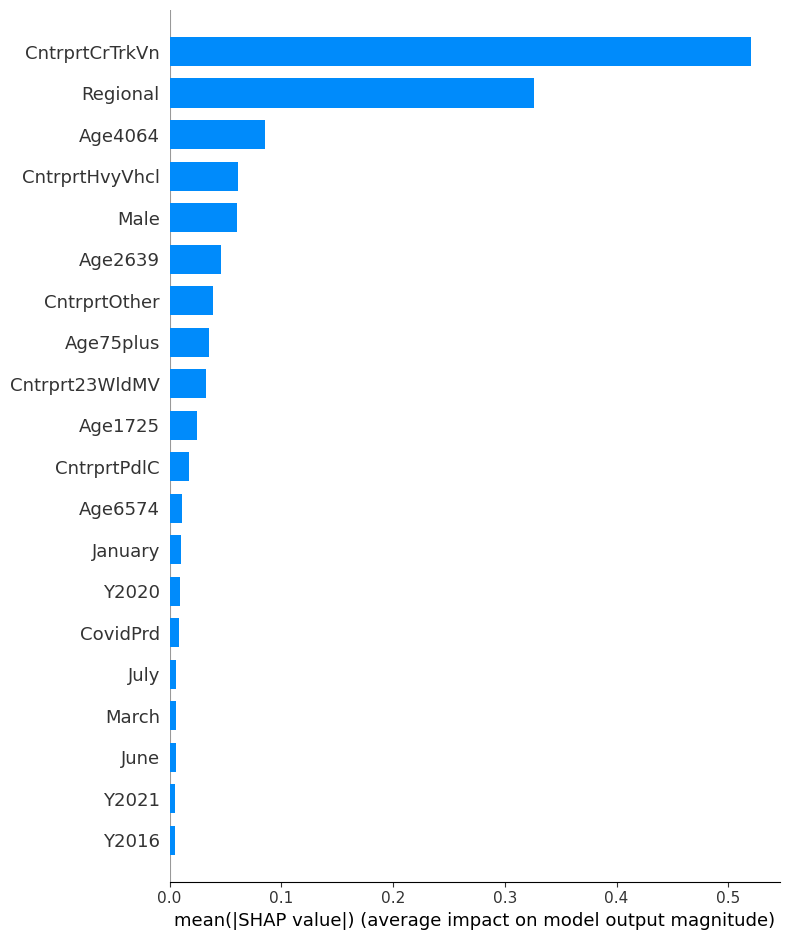

In [46]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                       Feature  Mean SHAP Value
CntrprtCrTrkVn  CntrprtCrTrkVn         0.520264
Regional              Regional         0.326274
Age4064                Age4064         0.085503
CntrprtHvyVhcl  CntrprtHvyVhcl         0.061097
Male                      Male         0.060051
Age2639                Age2639         0.045609
CntrprtOther      CntrprtOther         0.038596
Age75plus            Age75plus         0.034990
Cntrprt23WldMV  Cntrprt23WldMV         0.032370
Age1725                Age1725         0.024197


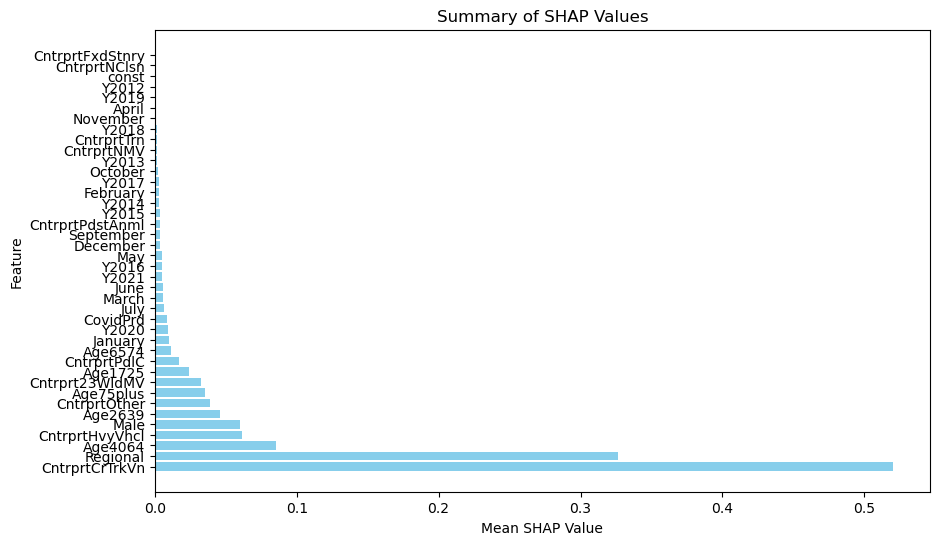

In [47]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


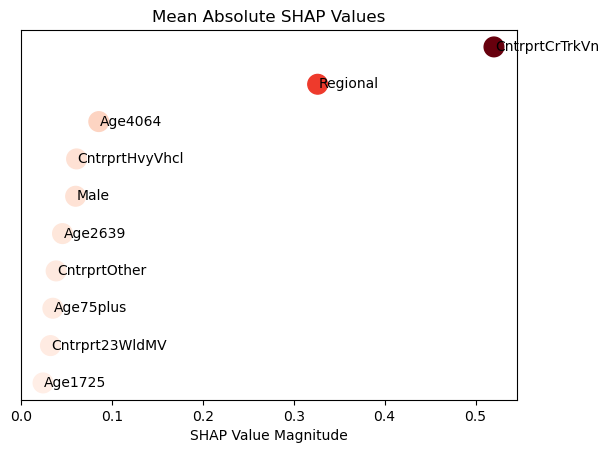

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Reds')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(9, 9))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()


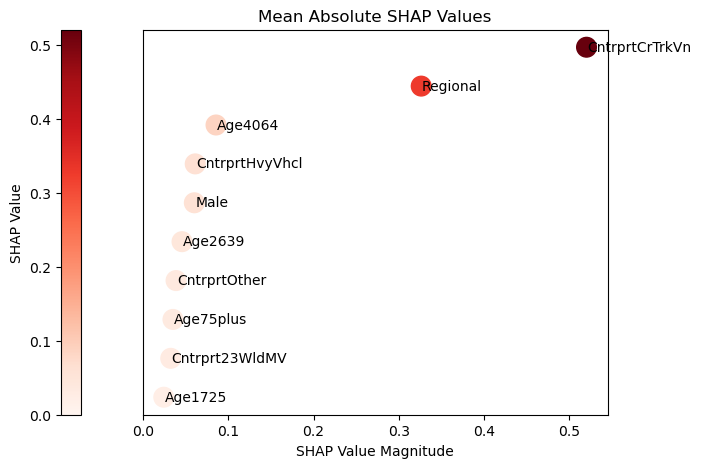

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Reds')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

fig, ax = plt.subplots(figsize=(8, 5))

top_features_indices = sorted_indices[-10:]  
scatter = ax.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    ax.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

ax.set_xlabel('SHAP Value Magnitude')
ax.set_title('Mean Absolute SHAP Values')

ax.set_yticks([])

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,location='left')
cbar.set_label('SHAP Value')

plt.show()


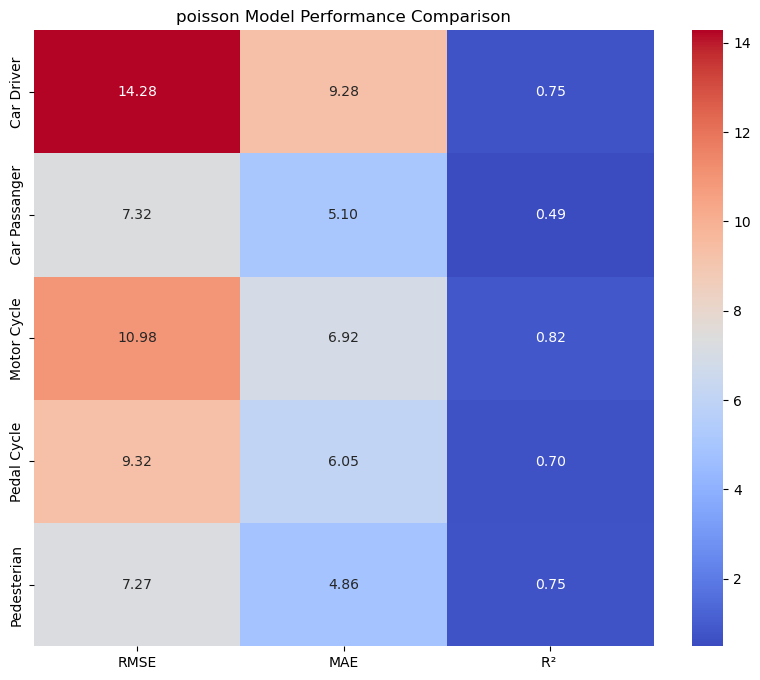

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
mse_values = [14.28   , 7.32  , 10.98   , 9.32,7.27]
mae_values = [9.28    ,5.10   ,6.92     , 6.05,   4.86  ]
r2_values = [ 0.75    , 0.49  , 0.82    ,0.7  ,0.75]

# ایجاد داده‌ها برای هیت مپ
metrics = ['Car Driver', ' Car Passanger ', 'Motor Cycle', 'Pedal Cycle', 'Pedesterian']
models = ['RMSE', 'MAE', 'R² ']
data = np.array([mse_values, mae_values, r2_values]).T
#metrics
# ایجاد هیت مپ
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data, annot=True, fmt='.2f', xticklabels=models, yticklabels=metrics, cmap='coolwarm')
heatmap.set_title('poisson Model Performance Comparison')

plt.show()

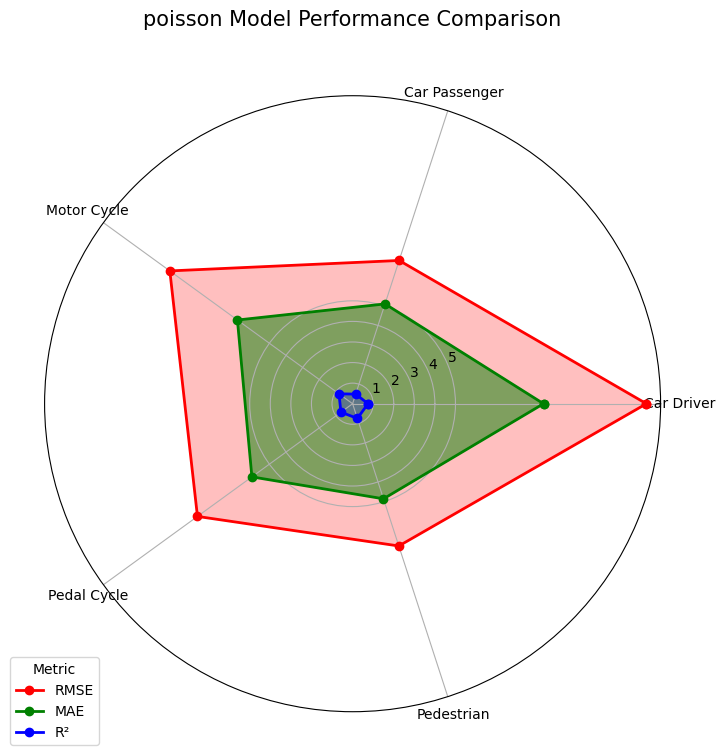

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [14.28   , 7.32  , 10.98   , 9.32,7.27]
mae_values = [9.28    ,5.10   ,6.92     , 6.05,   4.86  ]
r2_values = [ 0.75    , 0.49  , 0.82    ,0.7  ,0.75]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  # تنظیم شفافیت برای MAE
    else:
        alpha_value = 0.25  # تنظیم شفافیت برای سایر معیارها
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('poisson Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


In [40]:
Nmse_values

[0.3238647368813774,
 0.4286883330989723,
 0.32157879430922803,
 0.41820080326654807,
 0.29863911203509075]

In [41]:
ioa_values

[0.9245845816204731,
 0.8134183990481783,
 0.9460507146187671,
 0.8988022432349482,
 0.9236903072084335]

In [42]:
r2_values

[0.75, 0.49, 0.82, 0.7, 0.75]

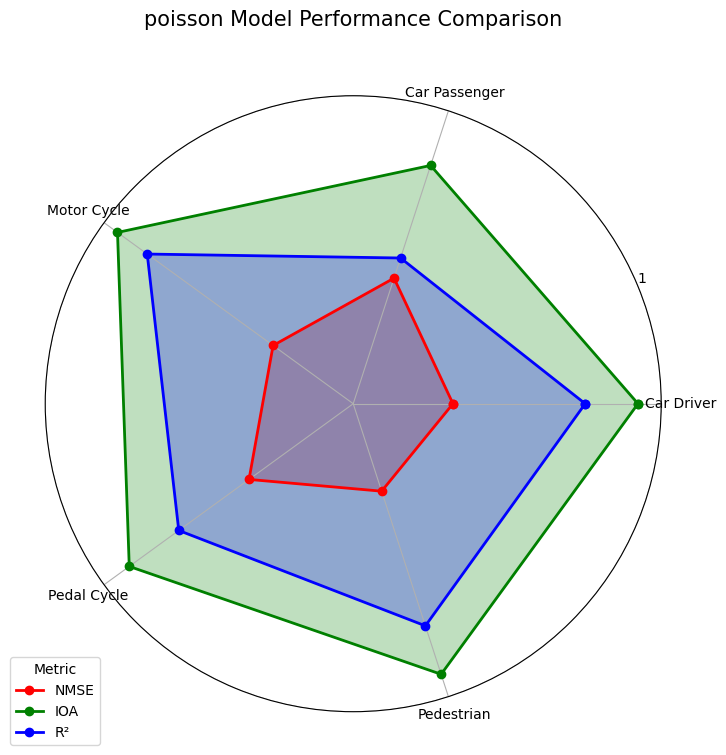

In [43]:
import matplotlib.pyplot as plt
import numpy as np

nmse_values = [0.3238647368813774,
 0.4286883330989723,
 0.32157879430922803,
 0.41820080326654807,
 0.29863911203509075]


ioa_values = [0.9245845816204731,
 0.8134183990481783,
 0.9460507146187671,
 0.8988022432349482,
 0.9236903072084335]

r2_values =[0.7532146007910308,
 0.4974418044714126,
 0.8267279533875785,
 0.7001375761385774,
 0.7583487122387149]

labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

data = np.array([nmse_values, ioa_values, r2_values])

num_vars = data.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['red', 'green', 'blue']
labels_metric = ['NMSE', 'IOA', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  
    else:
        alpha_value = 0.25 
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('poisson Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_ylim(0, 1)

plt.show()


In [45]:


average_bic = sum(bic_values) / len(bic_values)

# چاپ میانگین AIC
print(" BIC:", average_bic)


average_aic = sum(aic_values) / len(aic_values)

# چاپ میانگین AIC
print(" AIC:", average_aic)


 BIC: 14738.635059249616
 AIC: 14491.63297216799
